<a href="https://colab.research.google.com/github/TsaiMandy9112/Artificial-Intelligence/blob/main/%E3%80%8CAI_Chapter4_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion-MNIST**

In [ ]:
"""
import os
import gzip
import numpy as np

def load_mnist(path, kind):
  # Load MNIST data from 'path'
  labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
  images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
  with gzip.open(labels_path, 'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
  with gzip.open(images_path, 'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
  return images, labels
"""

4431872/4422102 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


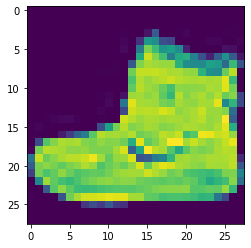

In [ ]:
from tensorflow.compat.v1.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

plt.imshow(x_train[0])
plt.show()

# **Mean-Square Error**

In [ ]:
import numpy as np
def mean_square_sum(y,t):
  return (1.0/2.0)*np.sum(np.square(y-t))

a = np.random.randint(0, 10, 5)
b = np.random.randint(0, 10, 5)
print(mean_square_sum(a,b))

17.0


# **Corss Entropy**

In [ ]:
import numpy as np
def cross_entropy(y,t):
  return -1*np.sum(t*np.log(y+1e-7))

a = np.random.random(5)
b = np.random.randint(0, 2, 5)
print(cross_entropy(a,b))

0.975176353491255


# **訓練神經網路**

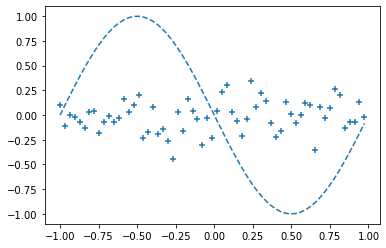

Epoch:0/2001 Error:0.2853985178456924


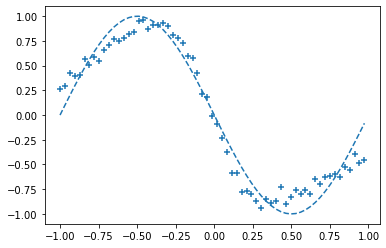

Epoch:200/2001 Error:0.010615024361232699


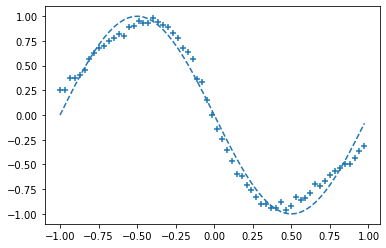

Epoch:400/2001 Error:0.0054698818938591276


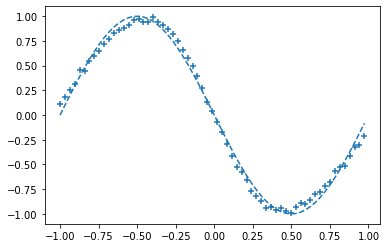

Epoch:600/2001 Error:0.0017179824403074368


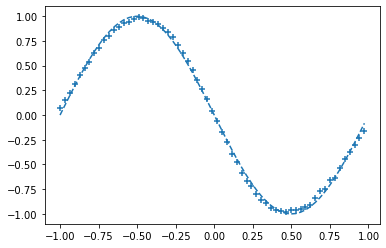

Epoch:800/2001 Error:0.0005345628675261014


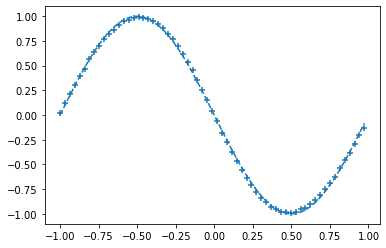

Epoch:1000/2001 Error:0.00016681384048250925


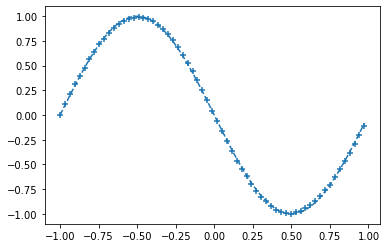

Epoch:1200/2001 Error:5.7538985613877904e-05


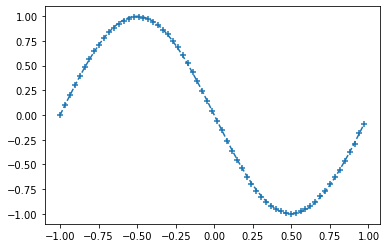

Epoch:1400/2001 Error:2.3041401111962813e-05


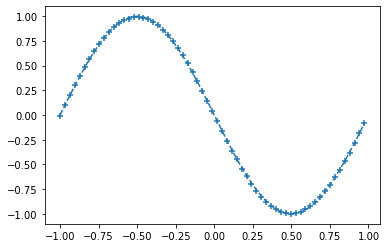

Epoch:1600/2001 Error:1.3943018590866704e-05


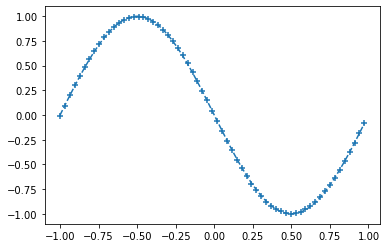

Epoch:1800/2001 Error:1.037574255557625e-05


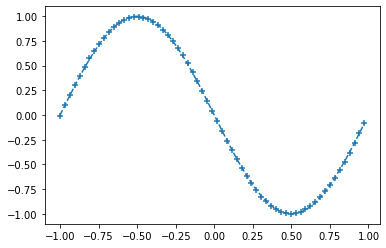

Epoch:2000/2001 Error:9.11597097390166e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# —準備輸入與正解—
input_data = np.arange(0, np.pi * 2, 0.1) #輸入
correct_data = np.sin(input_data) #正確答案
input_data = (input_data-np.pi)/np.pi # 輸入為-1.0～1.0的範圍內
n_data = len(correct_data) #資料的數量

# —各設定值—
n_in = 1 #輸入層的神經元數量
n_mid = 3 #中間層的神經元數量
n_out = 1 #輸出層的神經元數量

wb_width = 0.01 #權重與偏值的範圍
eta = 0.1 #學習率
epoch = 2001
interval = 200 #顯示進度的間隔

# —中間層—
class MiddleLayer:
  def __init__(self, n_upper, n): #初期設定
    self.w1 = wb_width * np.random.randn(n_upper, n) #權重（矩陣）
    self.b1 = wb_width * np.random.randn(n)  #偏值（向量）

  def forward(self, x): #前向傳播
    self.x = x
    u1 = np.dot(x, self.w1) + self.b1
    self.y1 = 1/(1+np.exp(-u1)) #sigmoid函數

  def backward(self, grad_y1): #反向傳播
    delta1 = grad_y1 * (1-self.y1)*self.y1 #sigmoid函數的微分

    self.grad_w1= np.dot(self.x.T, delta1)
    self.grad_b1 = np.sum(delta1, axis=0)

  def update(self, eta): #更新權重與偏值
    self.w1 -= eta * self.grad_w1
    self.b1 -= eta * self.grad_b1

# —輸出層—
class OutputLayer:
  def __init__(self, n_upper, n): #初期設定
    self.w2 = wb_width * np.random.randn(n_upper, n) #權重（矩陣）
    self.b2 = wb_width * np.random.randn(n) #偏值（向量）

  def forward(self, y1): #前向傳播
    self.y1 = y1
    u2 = np.dot(y1, self.w2) + self.b2
    self.y2 = u2 #恆等函數

  def backward(self, t): #反向傳播
    delta2 = self.y2 - t

    self.grad_w2 = np.dot(self.y1.T, delta2)
    self.grad_b2 = np.sum(delta2, axis=0)

    self.grad_y1 = np.dot(delta2, self.w2.T)

  def update(self, eta): #更新權重與偏值
    self.w2 -= eta * self.grad_w2
    self.b2 -= eta * self.grad_b2

# —各層的初始化—
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# —學習—
for i in range(epoch):
  #索引洗牌
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)

  #顯示結果用
  total_error = 0
  plot_x = []
  plot_y2 = []

  for idx in index_random:
    x = input_data[idx:idx+1] #輸入
    t = correct_data[idx:idx+1] #正確答案

    #前向傳播
    middle_layer.forward(x.reshape(1, 1)) #把輸入轉換成陣列
    output_layer.forward(middle_layer.y1)

    #反向傳播
    output_layer.backward(t.reshape(1, 1)) #反向傳播
    middle_layer.backward(output_layer.grad_y1)

    #更新權重與偏值
    middle_layer.update(eta)
    output_layer.update(eta)

    if i%interval == 0:

      y2 = output_layer.y2.reshape(-1) #將矩陣恢復成向量

      #誤差計算
      total_error += 1.0/2.0 * np.sum(np.square(y2 - t)) #計算均方誤差

      #輸出的記錄
      plot_x.append(x)
      plot_y2.append(y2)

  if i%interval == 0:

    #顯示輸出的圖表
    plt.plot(input_data, correct_data, linestyle="dashed")
    plt.scatter(plot_x, plot_y2, marker="+")
    plt.show()

    #顯示epoch次數與誤差
    print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))